In [ ]:
CREATE TABLE dados_captura (
    id INT PRIMARY KEY IDENTITY(1,1),
    humidade FLOAT,
    data_captura DATETIME
);

DROP TABLE [dbo].[dados_captura];

In [ ]:
!wget -qO- ifconfig.co/ip

34.125.190.48


In [ ]:
!pip install pyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.8/329.8 KB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install psutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal


In [ ]:
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
!curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list > /etc/apt/sources.list.d/mssql-release.list
!exit
!sudo apt-get update
!sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18
!sudo ACCEPT_EULA=Y apt-get install -y mssql-tools18
!echo 'export PATH="$PATH:/opt/mssql-tools18/bin"' >> ~/.bashrc
!source ~/.bashrc
!sudo apt-get install -y unixodbc-dev

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   5782      0 --:--:-- --:--:-- --:--:--  5782
OK
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    89  100    89    0     0    717      0 --:--:-- --:--:-- --:--:--   717
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://packages.microsoft.com/ubuntu/20.04/prod focal InRelease [3,065 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://packages.microsoft.com/ubuntu/20.04/prod focal/main amd64 Packages [190 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4

In [ ]:
#Sepup
import pyodbc
import random
from datetime import datetime, timedelta
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pdb
import random
import psutil
import time

inicio = time.time()

In [ ]:
tempos = []
memorias = []
def dados_memoria():
    tempo_atual = time.time() - inicio
    tempos.append(tempo_atual)
    memoria_atual = psutil.Process().memory_info().rss  /1024 /1024
    memorias.append(memoria_atual)
dados_memoria()

In [ ]:
def connect_db():
  conn_string = 'Driver={ODBC Driver 18 for SQL Server};Server=tcp:servidor-humidade.database.windows.net,1433;Database=leituras-humidade;Uid=breno.anjos@bandtec.com.br@servidor-humidade;Pwd={14052002Kb4_};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;'
  conn = pyodbc.connect(conn_string)
  dados_memoria()
  return conn.cursor()

In [ ]:
cursor = connect_db()
query = "SELECT * FROM dados_captura"
cursor.execute(query)
rows = cursor.fetchall()

humidades = []
datas = []

for row in rows:
    humidades.append(row[1])
    datas.append(row[2])
dados_memoria()    

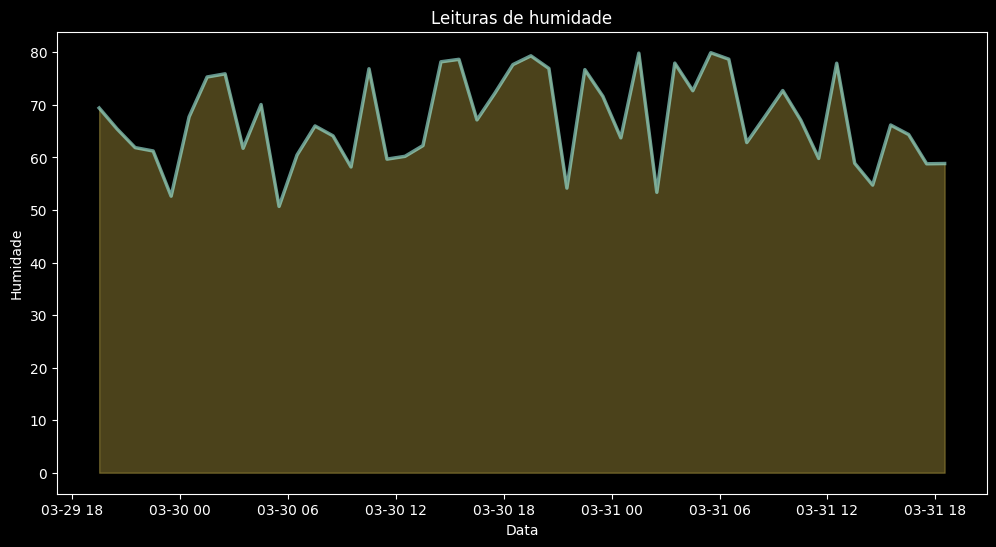

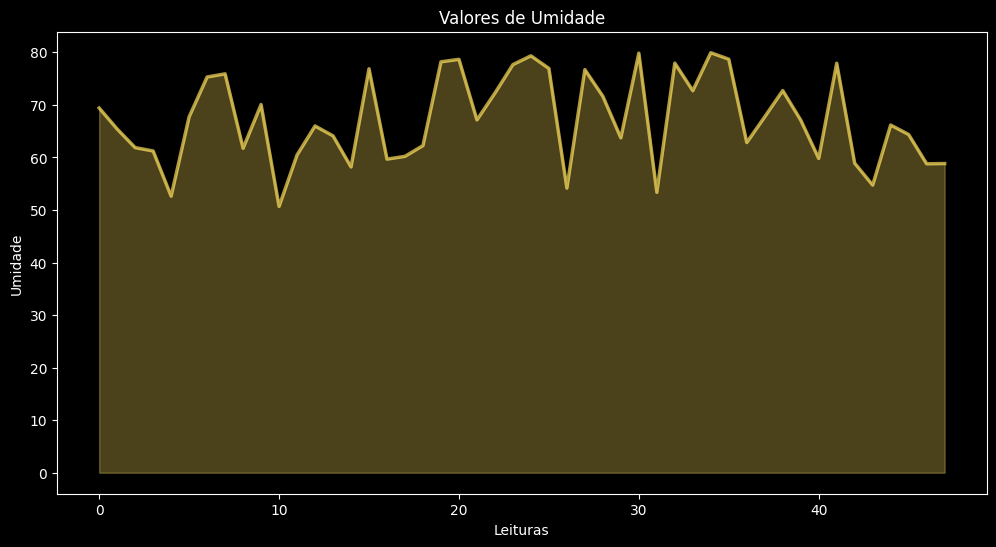

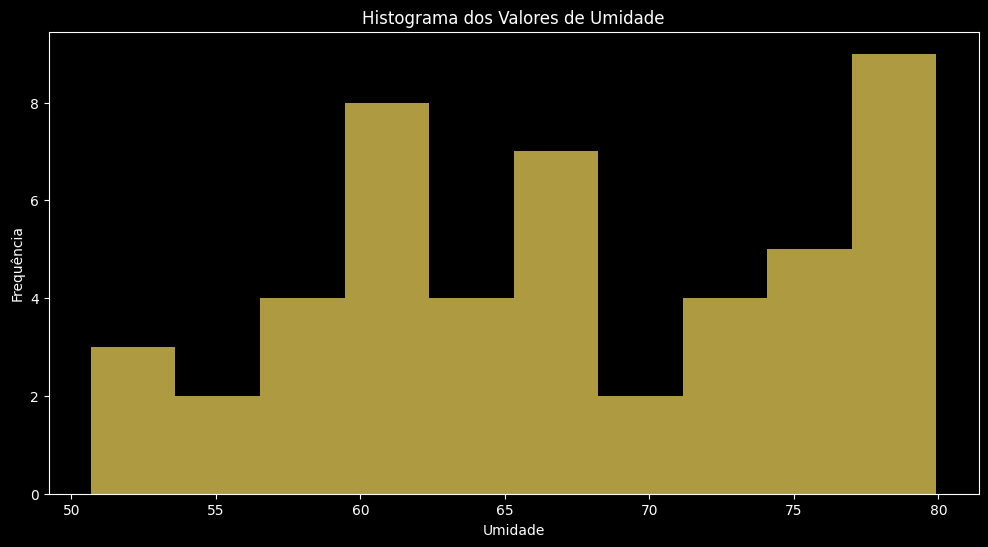

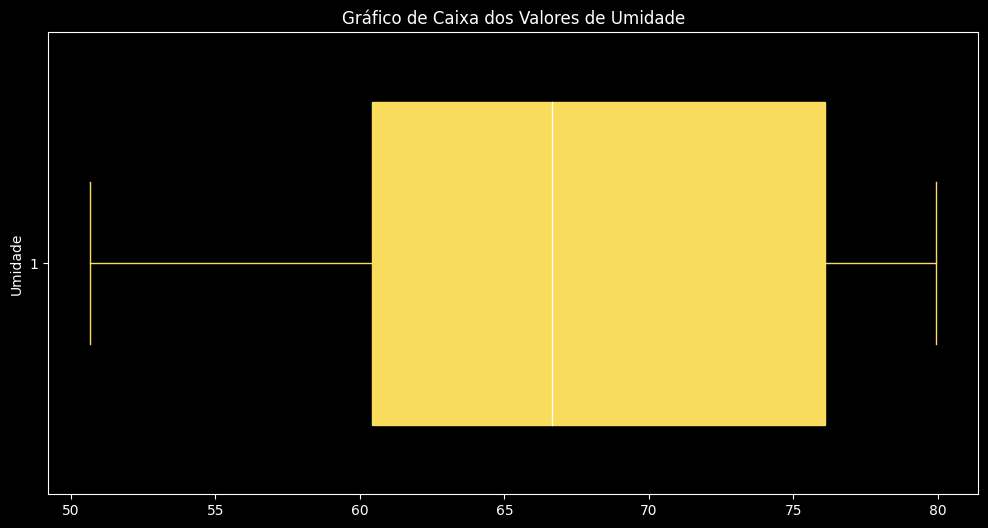

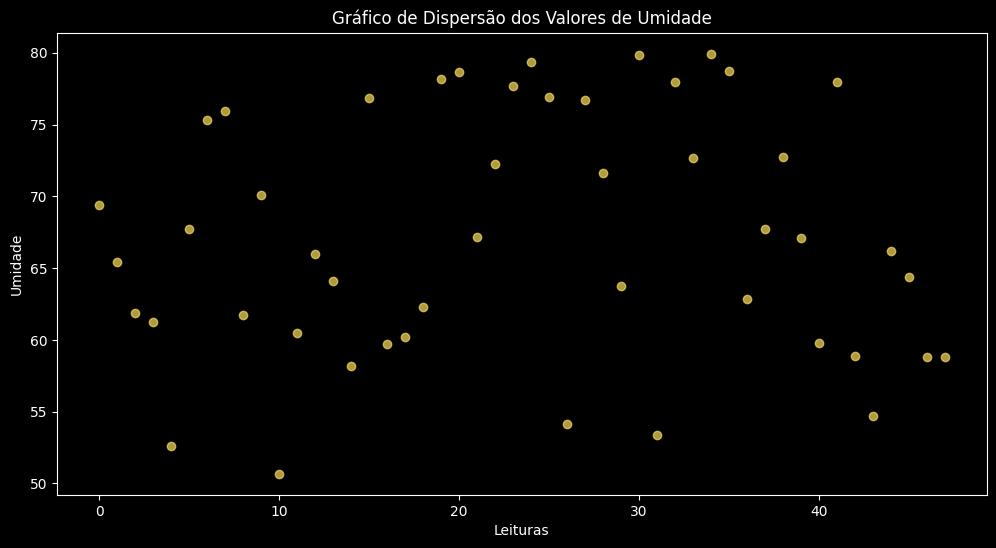

In [ ]:
sns.set_palette(sns.color_palette(["#F9DC5C"]))
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = [12, 6]

plt.plot(datas, humidades, linewidth=2.5, alpha=0.7)
plt.fill_between(datas, humidades, color="#F9DC5C", alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Humidade')
plt.title('Leituras de humidade')
plt.show()

plt.plot(humidades, color="#F9DC5C", linewidth=2.5, alpha=0.7)
plt.fill_between(range(len(humidades)), humidades, color="#F9DC5C", alpha=0.3)
plt.title('Valores de Umidade')
plt.xlabel('Leituras')
plt.ylabel('Umidade')
plt.show()

plt.hist(humidades, bins=10, color="#F9DC5C", alpha=0.7)
plt.title('Histograma dos Valores de Umidade')
plt.xlabel('Umidade')
plt.ylabel('Frequência')
plt.show()

plt.boxplot([float(h) for h in humidades], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor="#F9DC5C", color="#F9DC5C"), whiskerprops=dict(color="#F9DC5C"), medianprops=dict(color="white"), capprops=dict(color="#F9DC5C"))
plt.title('Gráfico de Caixa dos Valores de Umidade')
plt.ylabel('Umidade')
plt.show()

x = range(len(humidades))
plt.scatter(x, humidades, color="#F9DC5C", alpha=0.7)
plt.title('Gráfico de Dispersão dos Valores de Umidade')
plt.xlabel('Leituras')
plt.ylabel('Umidade')
plt.show()

connect_db().close()
dados_memoria()

In [ ]:

query = "SELECT * FROM dados_captura"
cursor = connect_db()
cursor.execute(query)
rows = cursor.fetchall()

for row in rows:
    print(f"id: {row[0]}, humidade: {row[1]}, data_captura: {row[2]}")
    
connect_db().close()
dados_memoria()

id: 1, humidade: 69.41, data_captura: 2023-03-29 19:30:25
id: 2, humidade: 65.41, data_captura: 2023-03-29 20:30:26
id: 3, humidade: 61.87, data_captura: 2023-03-29 21:30:26
id: 4, humidade: 61.23, data_captura: 2023-03-29 22:30:27
id: 5, humidade: 52.63, data_captura: 2023-03-29 23:30:28
id: 6, humidade: 67.73, data_captura: 2023-03-30 00:30:28
id: 7, humidade: 75.31, data_captura: 2023-03-30 01:30:29
id: 8, humidade: 75.91, data_captura: 2023-03-30 02:30:30
id: 9, humidade: 61.74, data_captura: 2023-03-30 03:30:30
id: 10, humidade: 70.07, data_captura: 2023-03-30 04:30:31
id: 11, humidade: 50.68, data_captura: 2023-03-30 05:30:31
id: 12, humidade: 60.47, data_captura: 2023-03-30 06:30:32
id: 13, humidade: 65.99, data_captura: 2023-03-30 07:30:33
id: 14, humidade: 64.11, data_captura: 2023-03-30 08:30:33
id: 15, humidade: 58.19, data_captura: 2023-03-30 09:30:34
id: 16, humidade: 76.88, data_captura: 2023-03-30 10:30:35
id: 17, humidade: 59.68, data_captura: 2023-03-30 11:30:35
id: 18

In [ ]:
#https://www.tempo.com/santos-sactual.htm

Tempo de execução: 1158.00 segundos


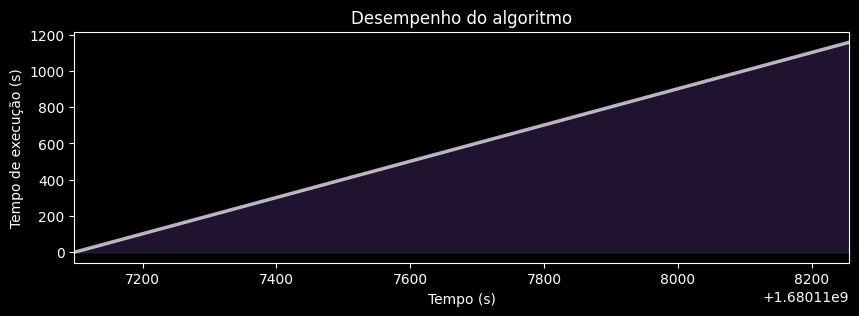

In [ ]:
cnxn = pyodbc.connect('Driver={ODBC Driver 18 for SQL Server};Server=tcp:servidor-humidade.database.windows.net,1433;Database=leituras-humidade;Uid=breno.anjos@bandtec.com.br@servidor-humidade;Pwd={14052002Kb4_};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;')
cursor = cnxn.cursor()
start_date = datetime.now()
humidade_list = []
data_captura_list = []

for i in range(48):
    humidade = round(random.uniform(50, 80), 2)
    data_captura = (datetime.now() + timedelta(hours=i)).strftime('%Y-%m-%d %H:%M:%S')
    humidade_list.append(humidade)
    data_captura_list.append(data_captura)
    query = f"INSERT INTO dados_captura (humidade, data_captura) VALUES ({humidade}, '{data_captura}')"
    cursor.execute(query)
    cursor.commit()

cursor.close()
dados_memoria()

sns.set_palette(sns.color_palette(["#F9DC5C"]))
plt.style.use('dark_background')

fim = time.time()
tempo_execucao = fim - inicio
print(f'Tempo de execução: {tempo_execucao:.2f} segundos')
tempo_x = [inicio, fim]
tempo_y = [0, tempo_execucao]
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(tempo_x, tempo_y,color="#FFFFFF", linewidth=2.5, alpha=0.7)
ax.fill_between(tempo_x, tempo_y, color="#6B3FA0", alpha=0.3)
ax.set_xlim(inicio, fim)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Tempo de execução (s)')
ax.set_title('Desempenho do algoritmo')
plt.show()

dados_memoria()

Text(0.5, 1.0, 'Uso de memória durante a execução do algoritmo')

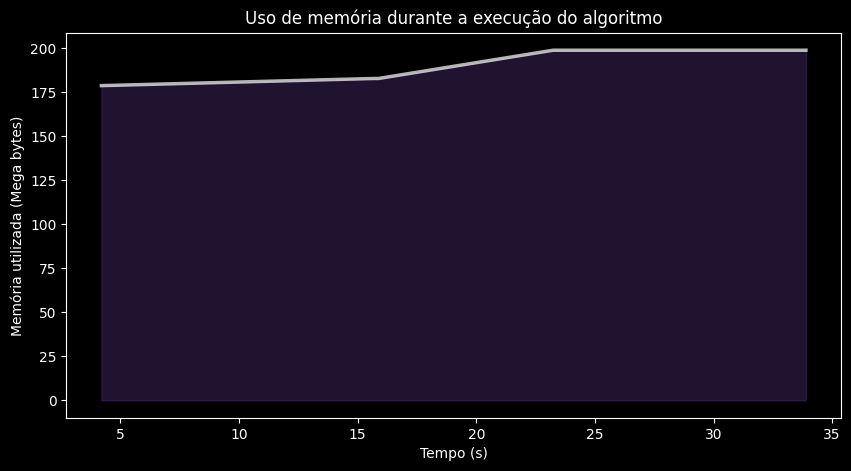

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(tempos, memorias,color="#FFFFFF", linewidth=2.5, alpha=0.7)
ax.fill_between(tempos, memorias, color="#6B3FA0", alpha=0.3)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Memória utilizada (Mega bytes)')
ax.set_title('Uso de memória durante a execução do algoritmo')